# _Black Friday Sale_

---------------------

## Бэклог
- [ ] вместо "Средняя сумма покупок" - Среднее количество покупок
- [ ] там, где 5 плотов растянуть верхний на 2 ячейки
- [x] доделать мультиплоты

### About Dataset

https://www.kaggle.com/datasets/rajeshrampure/black-friday-sale

#### Dataset History
A retail company “ABC Private Limited” wants to understand the customer purchase behavior (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high-volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city type, stayincurrentcity), product details (productid and product category), and Total purchase amount from last month.  
Now, they want to build a model to predict the purchase amount of customers against various products which will help them to create a personalized offer for customers against different products.

Tasks to perform  
The purchase col column is the Target Variable, perform Univariate Analysis and Bivariate Analysis w.r.t the Purchase.

Masked in the column description means already converted from categorical value to numerical column.

Below mentioned points are just given to get you started with the dataset, not mandatory to follow the same sequence.

#### DATA PREPROCESSING
Check basic statistics of the dataset  
Check for missing values in the data  
Check for unique values in data  

#### Perform EDA
Purchase Distribution  
Check for outliers  
Analysis by Gender, Marital Status, occupation, occupation vs purchase, purchase by city, purchase by age group, etc  
Drop unnecessary fields  
Convert categorical data into integer using map function (e.g 'Gender' column)  
Missing value treatment  
Rename columns  
Fill nan values  
Map range variables into integers (e.g 'Age' column)  

#### Data Visualisation

visualize an individual column  
Age vs Purchased  
Occupation vs Purchased  
Productcategory1 vs Purchased  
Productcategory2 vs Purchased  
Productcategory3 vs Purchased  
City category pie chart  
Check for more possible plots  

All the Best!!

#### Variable - Definition
User_ID - User ID  
Product_ID - Product ID  
Gender - Sex of User  
Age - Age in bins  
Occupation - Occupation (Masked)  
City_Category - Category of the City (A, B, C)  
Stay_In_Current_City_Years - Number of years stay in current city  
Marital_Status - Marital Status  
Product_Category_1 - Product Category (Masked)  
Product_Category_2 - Product may belong to other categories also (Masked)  
Product_Category_3 - Product may belong to other categories also (Masked)  
Purchase - Purchase Amount (Target Variable)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style='darkgrid', palette='pastel')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('black_friday_sale.csv')

In [4]:
df.columns = df.columns.str.lower()
# [i.lower() for i in df.columns]

In [5]:
for feature in df.columns:
    if feature not in ('user_id', 'product_id', 'purchase'):
        df[feature] = df[feature].astype('category')

In [6]:
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   user_id                     550068 non-null  int64   
 1   product_id                  550068 non-null  object  
 2   gender                      550068 non-null  category
 3   age                         550068 non-null  category
 4   occupation                  550068 non-null  category
 5   city_category               550068 non-null  category
 6   stay_in_current_city_years  550068 non-null  category
 7   marital_status              550068 non-null  category
 8   product_category_1          550068 non-null  category
 9   product_category_2          376430 non-null  category
 10  product_category_3          166821 non-null  category
 11  purchase                    550068 non-null  int64   
dtypes: category(9), int64(2), object(1)
memory usage: 17.3+ MB

In [9]:
df.describe()

,user_id,purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [19]:
df.user_id.nunique()

5891

In [15]:
df.describe(include=['category', 'object'])

,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3
count,550068,550068,550068,550068,550068,550068,550068,550068,376430.0,166821.0
unique,3631,2,7,21,3,5,2,20,17.0,15.0
top,P00265242,M,26-35,4,B,1,0,5,8.0,16.0
freq,1880,414259,219587,72308,231173,193821,324731,150933,64088.0,32636.0


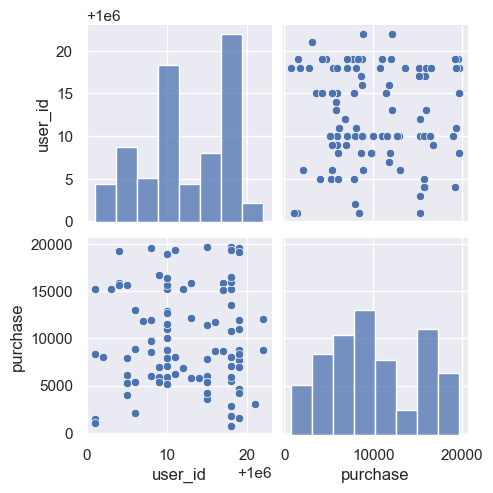

In [32]:
sns.pairplot(df.iloc[:100]);

### Распределения факторов

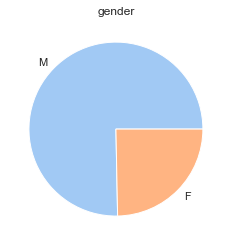

In [7]:
plt.pie(df.gender.value_counts(), labels=['M', 'F'])
plt.title('gender');

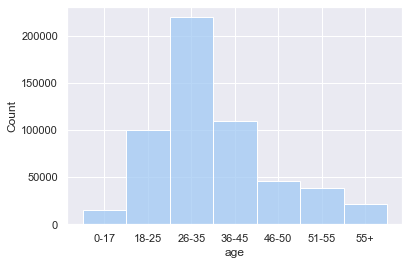

In [8]:
sns.histplot(data=df, x='age');

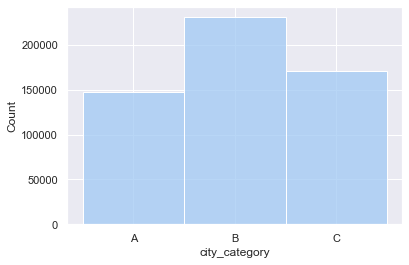

In [9]:
sns.histplot(data=df, x='city_category');

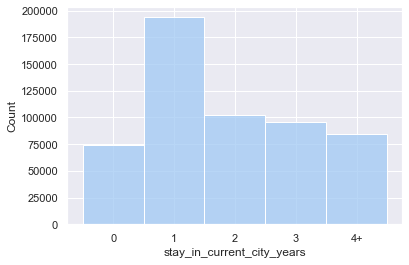

In [10]:
sns.histplot(data=df, x='stay_in_current_city_years');

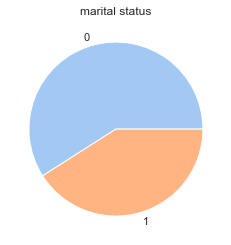

In [11]:
plt.pie(df.marital_status.value_counts(), labels=['0', '1'])
plt.title('marital status');

In [12]:
product_category_total_count = pd.concat(
        (df.product_category_1, df.product_category_2, df.product_category_3)
        ).value_counts().to_frame()

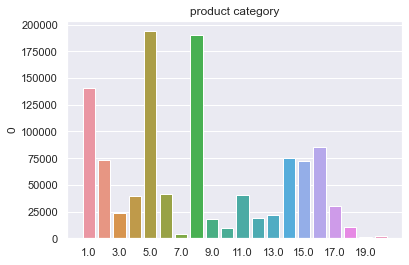

In [13]:
sns.barplot(data=product_category_total_count, x=product_category_total_count.index, y=0)
plt.locator_params(axis='x', nbins= 10)
plt.title('product category');

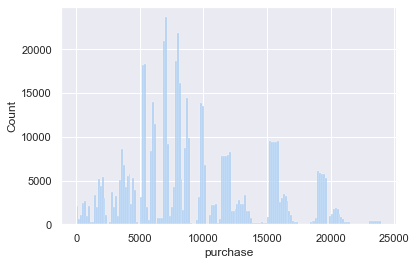

In [14]:
sns.histplot(data=df, x='purchase');

Откуда полосчатость?  
Выбросов, вроде, нет.

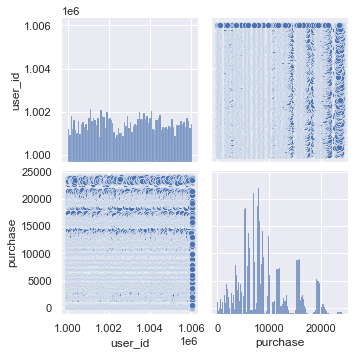

In [10]:
sns.pairplot(df);

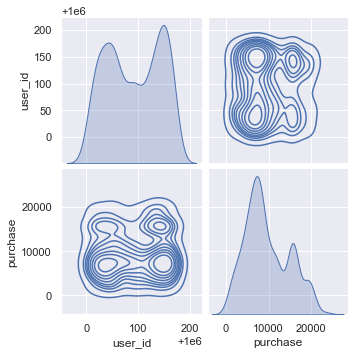

In [8]:
sns.pairplot(df[:1000], kind='kde');

### Распределение доходов по разным категориям

In [15]:
purchase_by_user = df.groupby('user_id')['purchase'].sum()

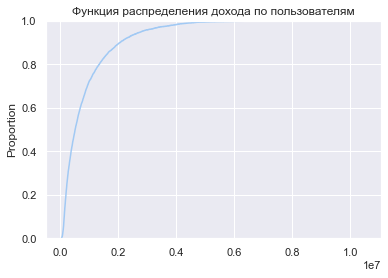

In [16]:
sns.ecdfplot(purchase_by_user.values)
plt.title('Функция распределения дохода по пользователям');
# Парето: 20% пользователей приносят 90% дохода

In [20]:
purchase_by_user.quantile(0.5)

521213.0

In [18]:
purchase_by_products = df.groupby('product_id')['purchase'].sum()

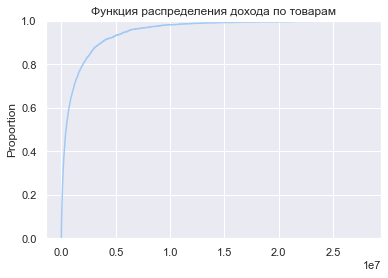

In [19]:
sns.ecdfplot(purchase_by_products.values)
plt.title('Функция распределения дохода по товарам');
# Парето: 20% товаров приносят 90% дохода

In [21]:
purchase_by_products.quantile(0.5)

437821.0

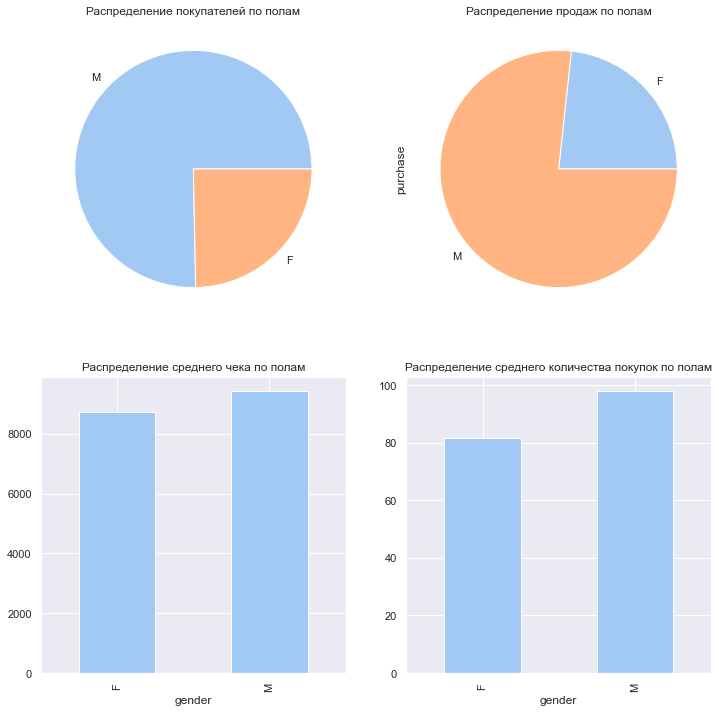

In [22]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.pie(df.gender.value_counts(), labels=['M', 'F'])
plt.title('Распределение покупателей по полам')

plt.subplot(2, 2, 2)
df.groupby('gender')['purchase'].sum().plot.pie()
plt.title('Распределение продаж по полам')

plt.subplot(2, 2, 3)
df.groupby('gender')['purchase'].mean().plot.bar()
plt.title('Распределение среднего чека по полам')

plt.subplot(2, 2, 4)
(df.groupby('gender')['purchase'].count()  / df.groupby('gender')['user_id'].nunique()).plot.bar()
plt.title('Распределение среднего количества покупок по полам');

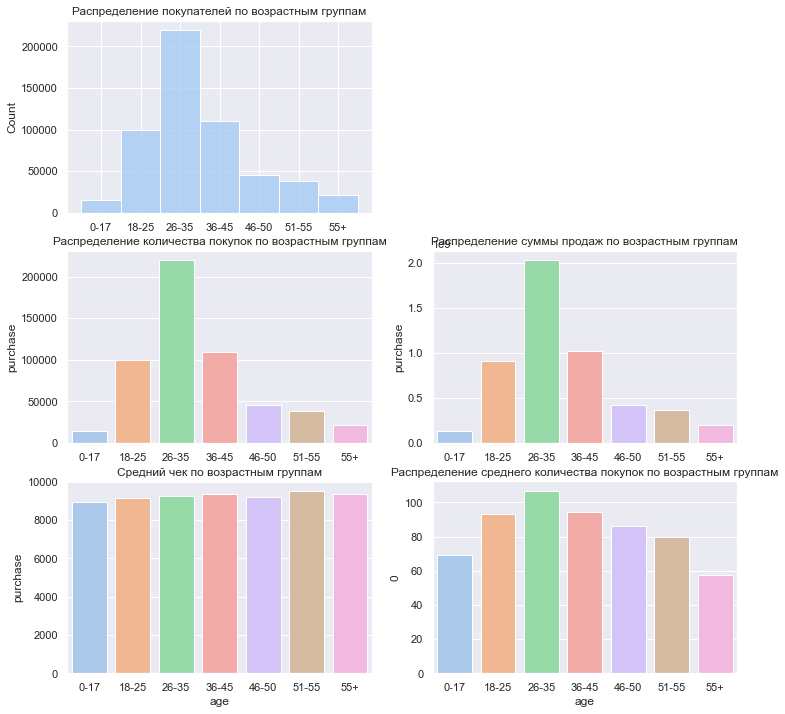

In [41]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
sns.histplot(data=df, x='age')
plt.title('Распределение покупателей по возрастным группам')
plt.xlabel('')

data = df.groupby('age')['purchase'].count()
data = data.reset_index()
plt.subplot(3, 2, 3)
sns.barplot(
    data=data, 
    x='age', 
    y='purchase')
plt.title('Распределение количества покупок по возрастным группам')
plt.xlabel('')

plt.subplot(3, 2, 4)
data = df.groupby('age')['purchase'].sum()
data = data.reset_index()
sns.barplot(
    data=data, 
    x='age', 
    y='purchase')
plt.title('Распределение суммы продаж по возрастным группам')
plt.xlabel('')

plt.subplot(3, 2, 5)
data = df.groupby('age')['purchase'].mean()
data = data.reset_index()
sns.barplot(
    data=data, 
    x='age', 
    y='purchase')
plt.title('Средний чек по возрастным группам')

plt.subplot(3, 2, 6)
data = df.groupby('age')['purchase'].count() / df.groupby('age')['user_id'].nunique()
data = data.reset_index()
sns.barplot(
    data=data, 
    x='age', 
    y=0)
plt.title('Распределение среднего количества покупок по возрастным группам');

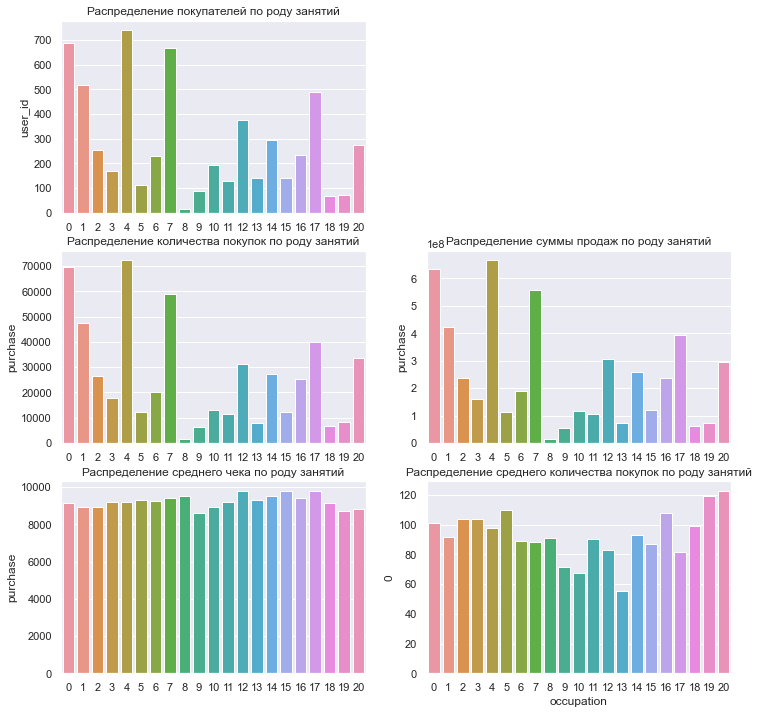

In [42]:
plt.figure(figsize=(12, 12))

data = df[['user_id', 'occupation']].drop_duplicates().groupby('occupation').count()
data = data.reset_index()
plt.subplot(3, 2, 1)
sns.barplot(
    data=data, 
    x='occupation', 
    y='user_id')
plt.title('Распределение покупателей по роду занятий')
plt.xlabel('')

data = df.groupby('occupation')['purchase'].count()
data = data.reset_index()
plt.subplot(3, 2, 3)
sns.barplot(
    data=data, 
    x='occupation', 
    y='purchase')
plt.title('Распределение количества покупок по роду занятий')
plt.xlabel('')

data = df.groupby('occupation')['purchase'].sum()
data = data.reset_index()
plt.subplot(3, 2, 4)
sns.barplot(
    data=data, 
    x='occupation', 
    y='purchase')
plt.title('Распределение суммы продаж по роду занятий')
plt.xlabel('')

data = df.groupby('occupation')['purchase'].mean()
data = data.reset_index()
plt.subplot(3, 2, 5)
sns.barplot(
    data=data, 
    x='occupation', 
    y='purchase')
plt.title('Распределение среднего чека по роду занятий')
plt.xlabel('')

plt.subplot(3, 2, 6)
data = df.groupby('occupation')['purchase'].count() / df.groupby('occupation')['user_id'].nunique()
data = data.reset_index()
sns.barplot(
    data=data, 
    x='occupation', 
    y=0)
plt.title('Распределение среднего количества покупок по роду занятий');

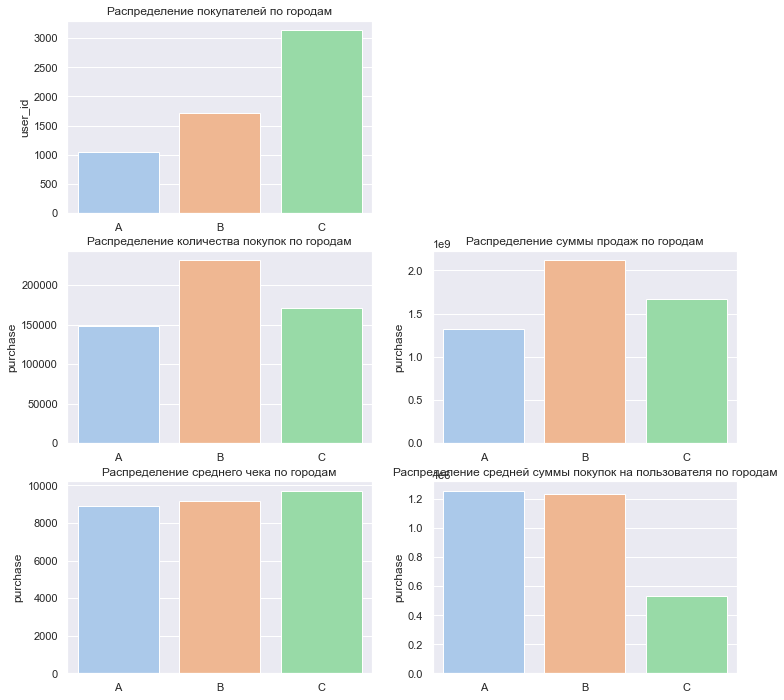

In [45]:
plt.figure(figsize=(12, 12))

data = df[['user_id', 'city_category']].drop_duplicates().groupby('city_category').count()
data = data.reset_index()
plt.subplot(3, 2, 1)
sns.barplot(
    data=data, 
    x='city_category', 
    y='user_id')
plt.title('Распределение покупателей по городам')
plt.xlabel('')

data = df.groupby('city_category')['purchase'].count()
data = data.reset_index()
plt.subplot(3, 2, 3)
sns.barplot(
    data=data, 
    x='city_category', 
    y='purchase')
plt.title('Распределение количества покупок по городам')
plt.xlabel('')

data = df.groupby('city_category')['purchase'].sum()
data = data.reset_index()
plt.subplot(3, 2, 4)
sns.barplot(
    data=data, 
    x='city_category', 
    y='purchase')
plt.title('Распределение суммы продаж по городам')
plt.xlabel('')

data = df.groupby('city_category')['purchase'].mean()
data = data.reset_index()
plt.subplot(3, 2, 5)
sns.barplot(
    data=data, 
    x='city_category', 
    y='purchase')
plt.title('Распределение среднего чека по городам')
plt.xlabel('')

data = pd.merge(df.groupby('user_id').sum(), 
                df[['user_id', 'city_category']].drop_duplicates()
                , on='user_id')\
            .groupby('city_category')['purchase'].mean()
data = data.reset_index()
plt.subplot(3, 2, 6)
sns.barplot(
    data=data, 
    x=data.city_category, 
    y=data.purchase)
plt.title('Распределение средней суммы покупок на пользователя по городам')
plt.xlabel('');

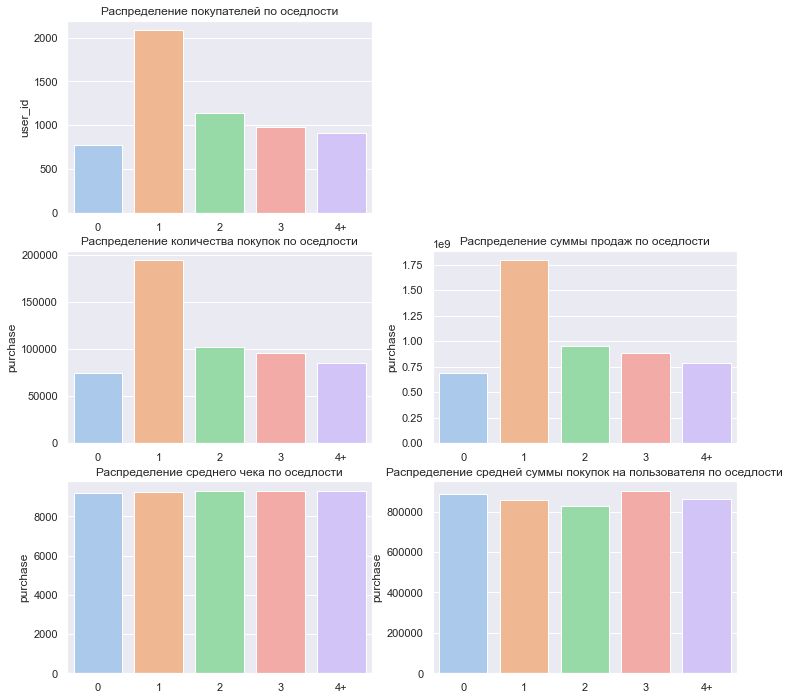

In [47]:
plt.figure(figsize=(12, 12))

data = df[['user_id', 'stay_in_current_city_years']].drop_duplicates().groupby('stay_in_current_city_years').count()
data = data.reset_index()
plt.subplot(3, 2, 1)
sns.barplot(
    data=data, 
    x='stay_in_current_city_years', 
    y='user_id')
plt.title('Распределение покупателей по оседлости')
plt.xlabel('')

data = df.groupby('stay_in_current_city_years')['purchase'].count()
data = data.reset_index()
plt.subplot(3, 2, 3)
sns.barplot(
    data=data, 
    x='stay_in_current_city_years', 
    y='purchase')
plt.title('Распределение количества покупок по оседлости')
plt.xlabel('')

data = df.groupby('stay_in_current_city_years')['purchase'].sum()
data = data.reset_index()
plt.subplot(3, 2, 4)
sns.barplot(
    data=data, 
    x='stay_in_current_city_years', 
    y='purchase')
plt.title('Распределение суммы продаж по оседлости')
plt.xlabel('')

data = df.groupby('stay_in_current_city_years')['purchase'].mean()
data = data.reset_index()
plt.subplot(3, 2, 5)
sns.barplot(
    data=data, 
    x='stay_in_current_city_years', 
    y='purchase')
plt.title('Распределение среднего чека по оседлости')
plt.xlabel('')

data = pd.merge(df.groupby('user_id').sum(), 
                df[['user_id', 'stay_in_current_city_years']].drop_duplicates()
                , on='user_id')\
            .groupby('stay_in_current_city_years')['purchase'].mean()
data = data.reset_index()
plt.subplot(3, 2, 6)
sns.barplot(
    data=data, 
    x=data.stay_in_current_city_years, 
    y=data.purchase)
plt.title('Распределение средней суммы покупок на пользователя по оседлости')
plt.xlabel('');

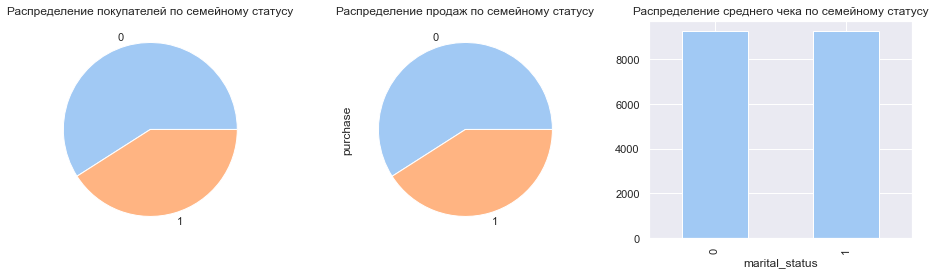

In [48]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.pie(df.marital_status.value_counts(), labels=[0, 1])
plt.title('Распределение покупателей по семейному статусу')

plt.subplot(1, 3, 2)
df.groupby('marital_status')['purchase'].sum().plot.pie()
plt.title('Распределение продаж по семейному статусу')

plt.subplot(1, 3, 3)
df.groupby('marital_status')['purchase'].mean().plot.bar()
plt.title('Распределение среднего чека по семейному статусу');

In [33]:
df.shape[0], df.user_id.nunique()
# сотня покупок на человека?

(550068, 5891)

In [34]:
df.user_id.value_counts()
# фигня какая-то. Люди с тысячами покупок?

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: user_id, Length: 5891, dtype: int64

In [20]:
df[df.user_id == 1001680].loc[:, 'gender':'marital_status'].drop_duplicates()

,gender,age,occupation,city_category,stay_in_current_city_years,marital_status
11055,M,26-35,20,A,3,1


In [49]:
df[df.user_id == 1001941].loc[:, 'gender':'marital_status'].drop_duplicates()
# по параметрам, вроде, это одни и те же люди и в течение ~года

,gender,age,occupation,city_category,stay_in_current_city_years,marital_status
12911,M,36-45,17,A,1,0


In [51]:
(df.user_id.value_counts() < 10).sum()
# только 40 человек сделали < 10 покупок!?

40

In [63]:
(df.groupby('user_id').sum().sort_values(by='purchase', ascending=False) < 100000).sum()
# всего 165 купили меньше, чем на 100000

purchase    165
dtype: int64

In [54]:
# лидеры продаж среди продуктов. По количеству проданных товаров и сумме продаж

In [21]:
df.product_id.value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: product_id, Length: 3631, dtype: int64

In [55]:
sells_leaders = pd.concat([purchase_by_products, df.product_id.value_counts()], join='inner', axis=1)\
                        .rename(columns={'product_id': 'count'}, index={0:'product_id'})
sells_leaders.index.set_names('product_id', inplace=True)

In [56]:
sells_leaders.sort_values('purchase', ascending=False).head(10)
# отсортируем по сумме продаж

,purchase,count
product_id,,
P00025442,27995166,1615
P00110742,26722309,1612
P00255842,25168963,1383
P00059442,24338343,1406
P00184942,24334887,1440
P00112142,24216006,1562
P00110942,23639564,1360
P00237542,23425576,1394
P00057642,23102780,1470


In [57]:
sells_leaders.sort_values('count', ascending=False).head(10)
# отсортируем по проданным единицам товара

,purchase,count
product_id,,
P00265242,14165515,1880
P00025442,27995166,1615
P00110742,26722309,1612
P00112142,24216006,1562
P00057642,23102780,1470
P00184942,24334887,1440
P00046742,21152882,1438
P00058042,12250634,1422
P00145042,20411342,1406


In [6]:
df.head(5)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
# эксперименты с диаграммами

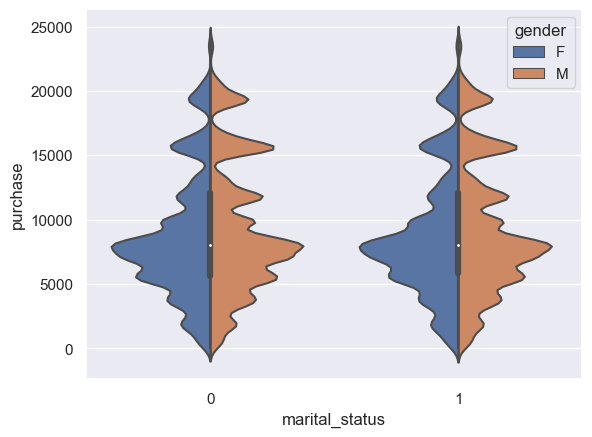

In [16]:
sns.violinplot(data=df, x='marital_status', y='purchase', hue='gender', split=True);

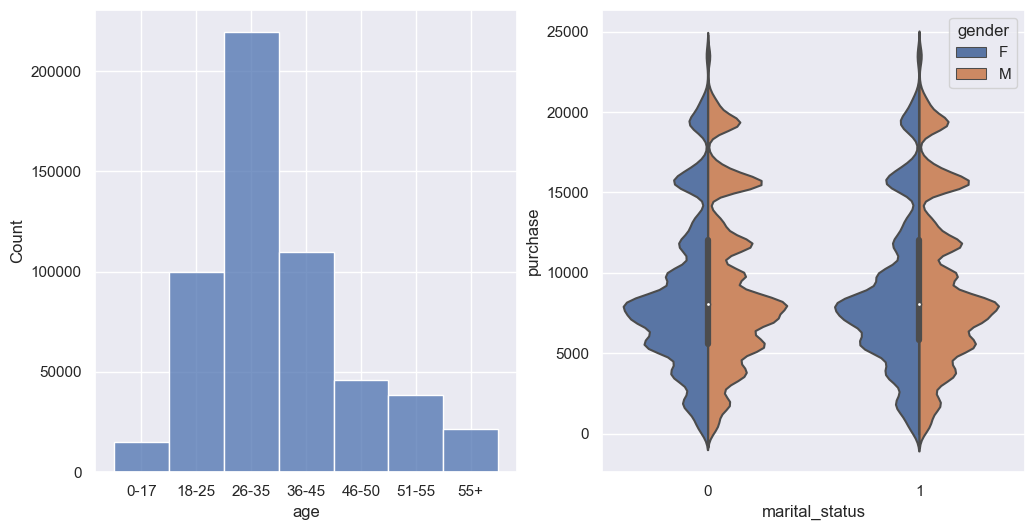

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=df, x='age', ax=ax[0])
sns.violinplot(data=df, x='marital_status', y='purchase', hue='gender', split=True, ax=ax[1]);

In [ ]:
# эксперименты с мультиплотами

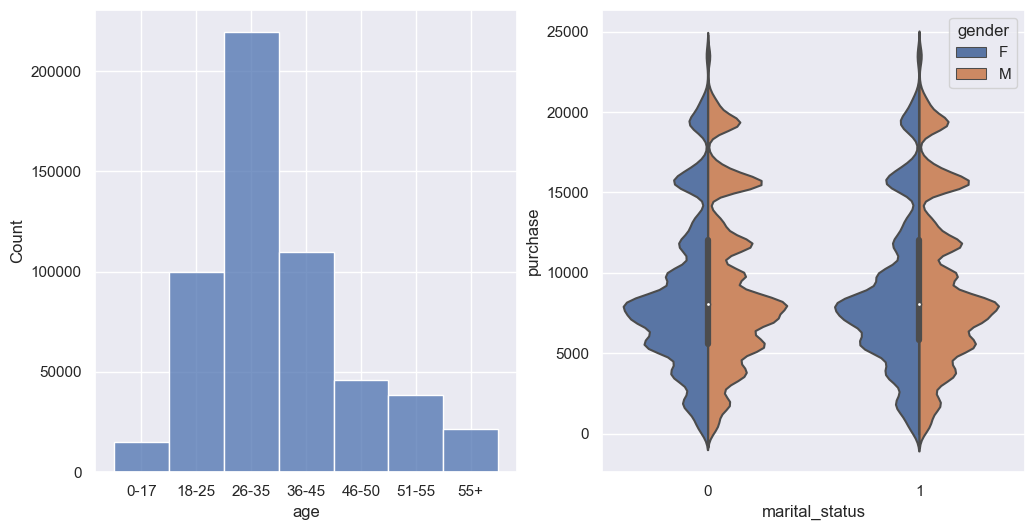

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='age')
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='marital_status', y='purchase', hue='gender', split=True);

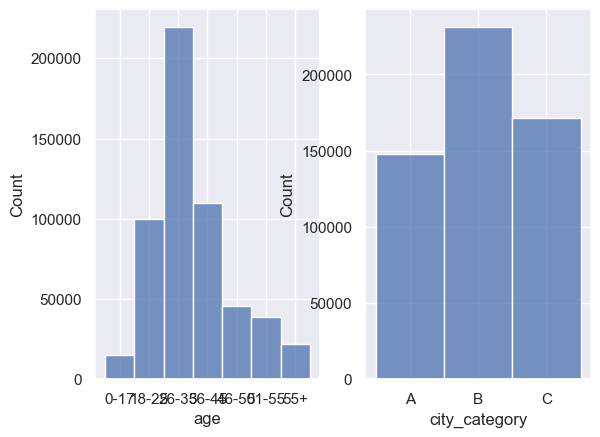

In [36]:
for i, v in (1, 'age'), (2, 'city_category'):
    plt.subplot(1, 2, i)
    sns.histplot(data=df, x=v)

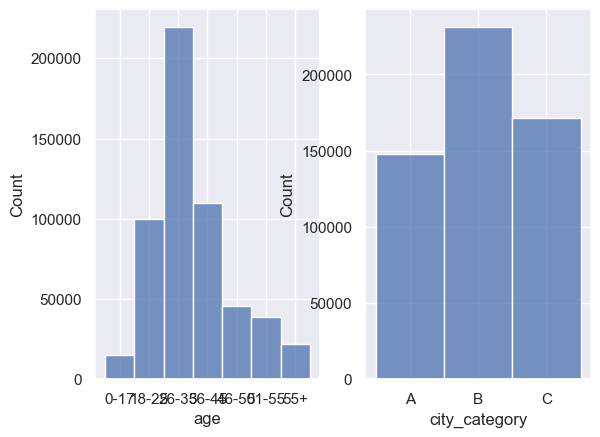

In [37]:
fig = plt.figure()
for i, v in (1, 'age'), (2, 'city_category'):
    ax = fig.add_subplot(1, 2, i)
    sns.histplot(data=df, x=v, ax=ax)

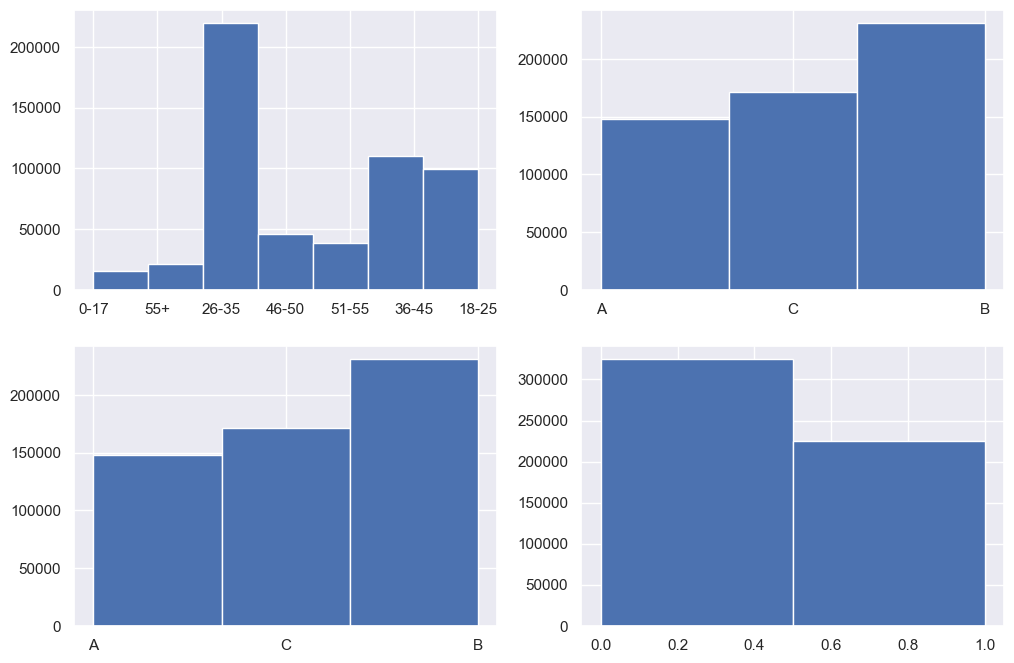

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
categ = ('age', 'city_category', 'city_category','marital_status')
for i in range(2):
    for j in range(2):
        ax[i, j].hist(df[categ[i + 2 * j]], bins=df[categ[i + 2 * j]].nunique())